In [1]:
import os
import zipfile
import pandas as pd
import cv2
from PIL import Image
import IPython.display as display
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten, Average
from tensorflow.keras.models import load_model, Model, clone_model

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
folder_path = '/img/'

# List files in the folder
files_in_folder = os.listdir(folder_path)
print(files_in_folder)


['H_139.jpg', 'H_11.jpg', 'H_114.jpg', 'H_74.jpg', 'H_25.jpg', 'H_91.jpg', 'H_100.jpg', 'H_14.jpg', 'H_10.jpg', 'H_140.jpg', 'H_145.jpg', 'H_111.jpg', 'H_95.jpg', 'H_136.jpg', 'H_20.jpg', 'H_77.jpg', 'H_37.jpg', 'H_108.jpg', 'H_54.jpg', 'H_22.jpg', 'H_36.jpg', 'H_82.jpg', 'H_92.jpg', 'H_71.jpg', 'H_66.jpg', 'H_128.jpg', 'H_137.jpg', 'H_148.jpg', 'H_81.jpg', 'H_117.jpg', 'H_75.jpg', 'H_73.jpg', 'H_141.jpg', 'H_26.jpg', 'H_131.jpg', 'H_57.jpg', 'H_105.jpg', 'H_41.jpg', 'H_150.jpg', 'H_19.jpg', 'H_28.jpg', 'H_107.jpg', 'H_70.jpg', 'H_86.jpg', 'H_121.jpg', 'H_2.jpg', 'H_103.jpg', 'H_132.jpg', 'H_7.jpg', 'H_62.jpg', 'H_127.jpg', 'H_124.jpg', 'H_18.jpg', 'H_46.jpg', 'H_50.jpg', 'H_15.jpg', 'H_69.jpg', 'H_90.jpg', 'H_146.jpg', 'H_84.jpg', 'H_13.jpg', 'H_123.jpg', 'H_68.jpg', 'H_49.jpg', 'H_133.jpg', 'H_16.jpg', 'H_88.jpg', 'H_147.jpg', 'H_31.jpg', 'H_138.jpg', 'H_6.jpg', 'H_33.jpg', 'H_24.jpg', 'H_5.jpg', 'H_65.jpg', 'H_35.jpg', 'H_23.jpg', 'H_89.jpg', 'H_85.jpg', 'H_76.jpg', 'H_12.jpg', 'H_1

In [3]:
# Load CSV file
csv_path = '/img/labels.csv'
df = pd.read_csv(csv_path)

# Assuming the columns are in the order: label, x_axis, y_axis, image_file_name, max_x_axis, max_y_axis
df.columns = ['label', 'x_axis', 'y_axis', 'image_file_name', 'max_x_axis', 'max_y_axis']

# Create lists to store image paths and annotations
image_paths = []
annotations = []

In [4]:
# Input and output directories
input_dir = '/img/'
output_dir = '/processed_images/'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Process each image in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith(".jpg"):
        # Load the image with OpenCV
        image_path = os.path.join(input_dir, filename)
        cv_image = cv2.imread(image_path)

        # Apply Gaussian blur to the entire image
        blurred_image = cv2.GaussianBlur(cv_image, (99, 99), 0)

        # Save the processed image in the output directory
        output_path = os.path.join(output_dir, filename)
        cv2.imwrite(output_path, blurred_image)

print("Processing complete")

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


Processing complete


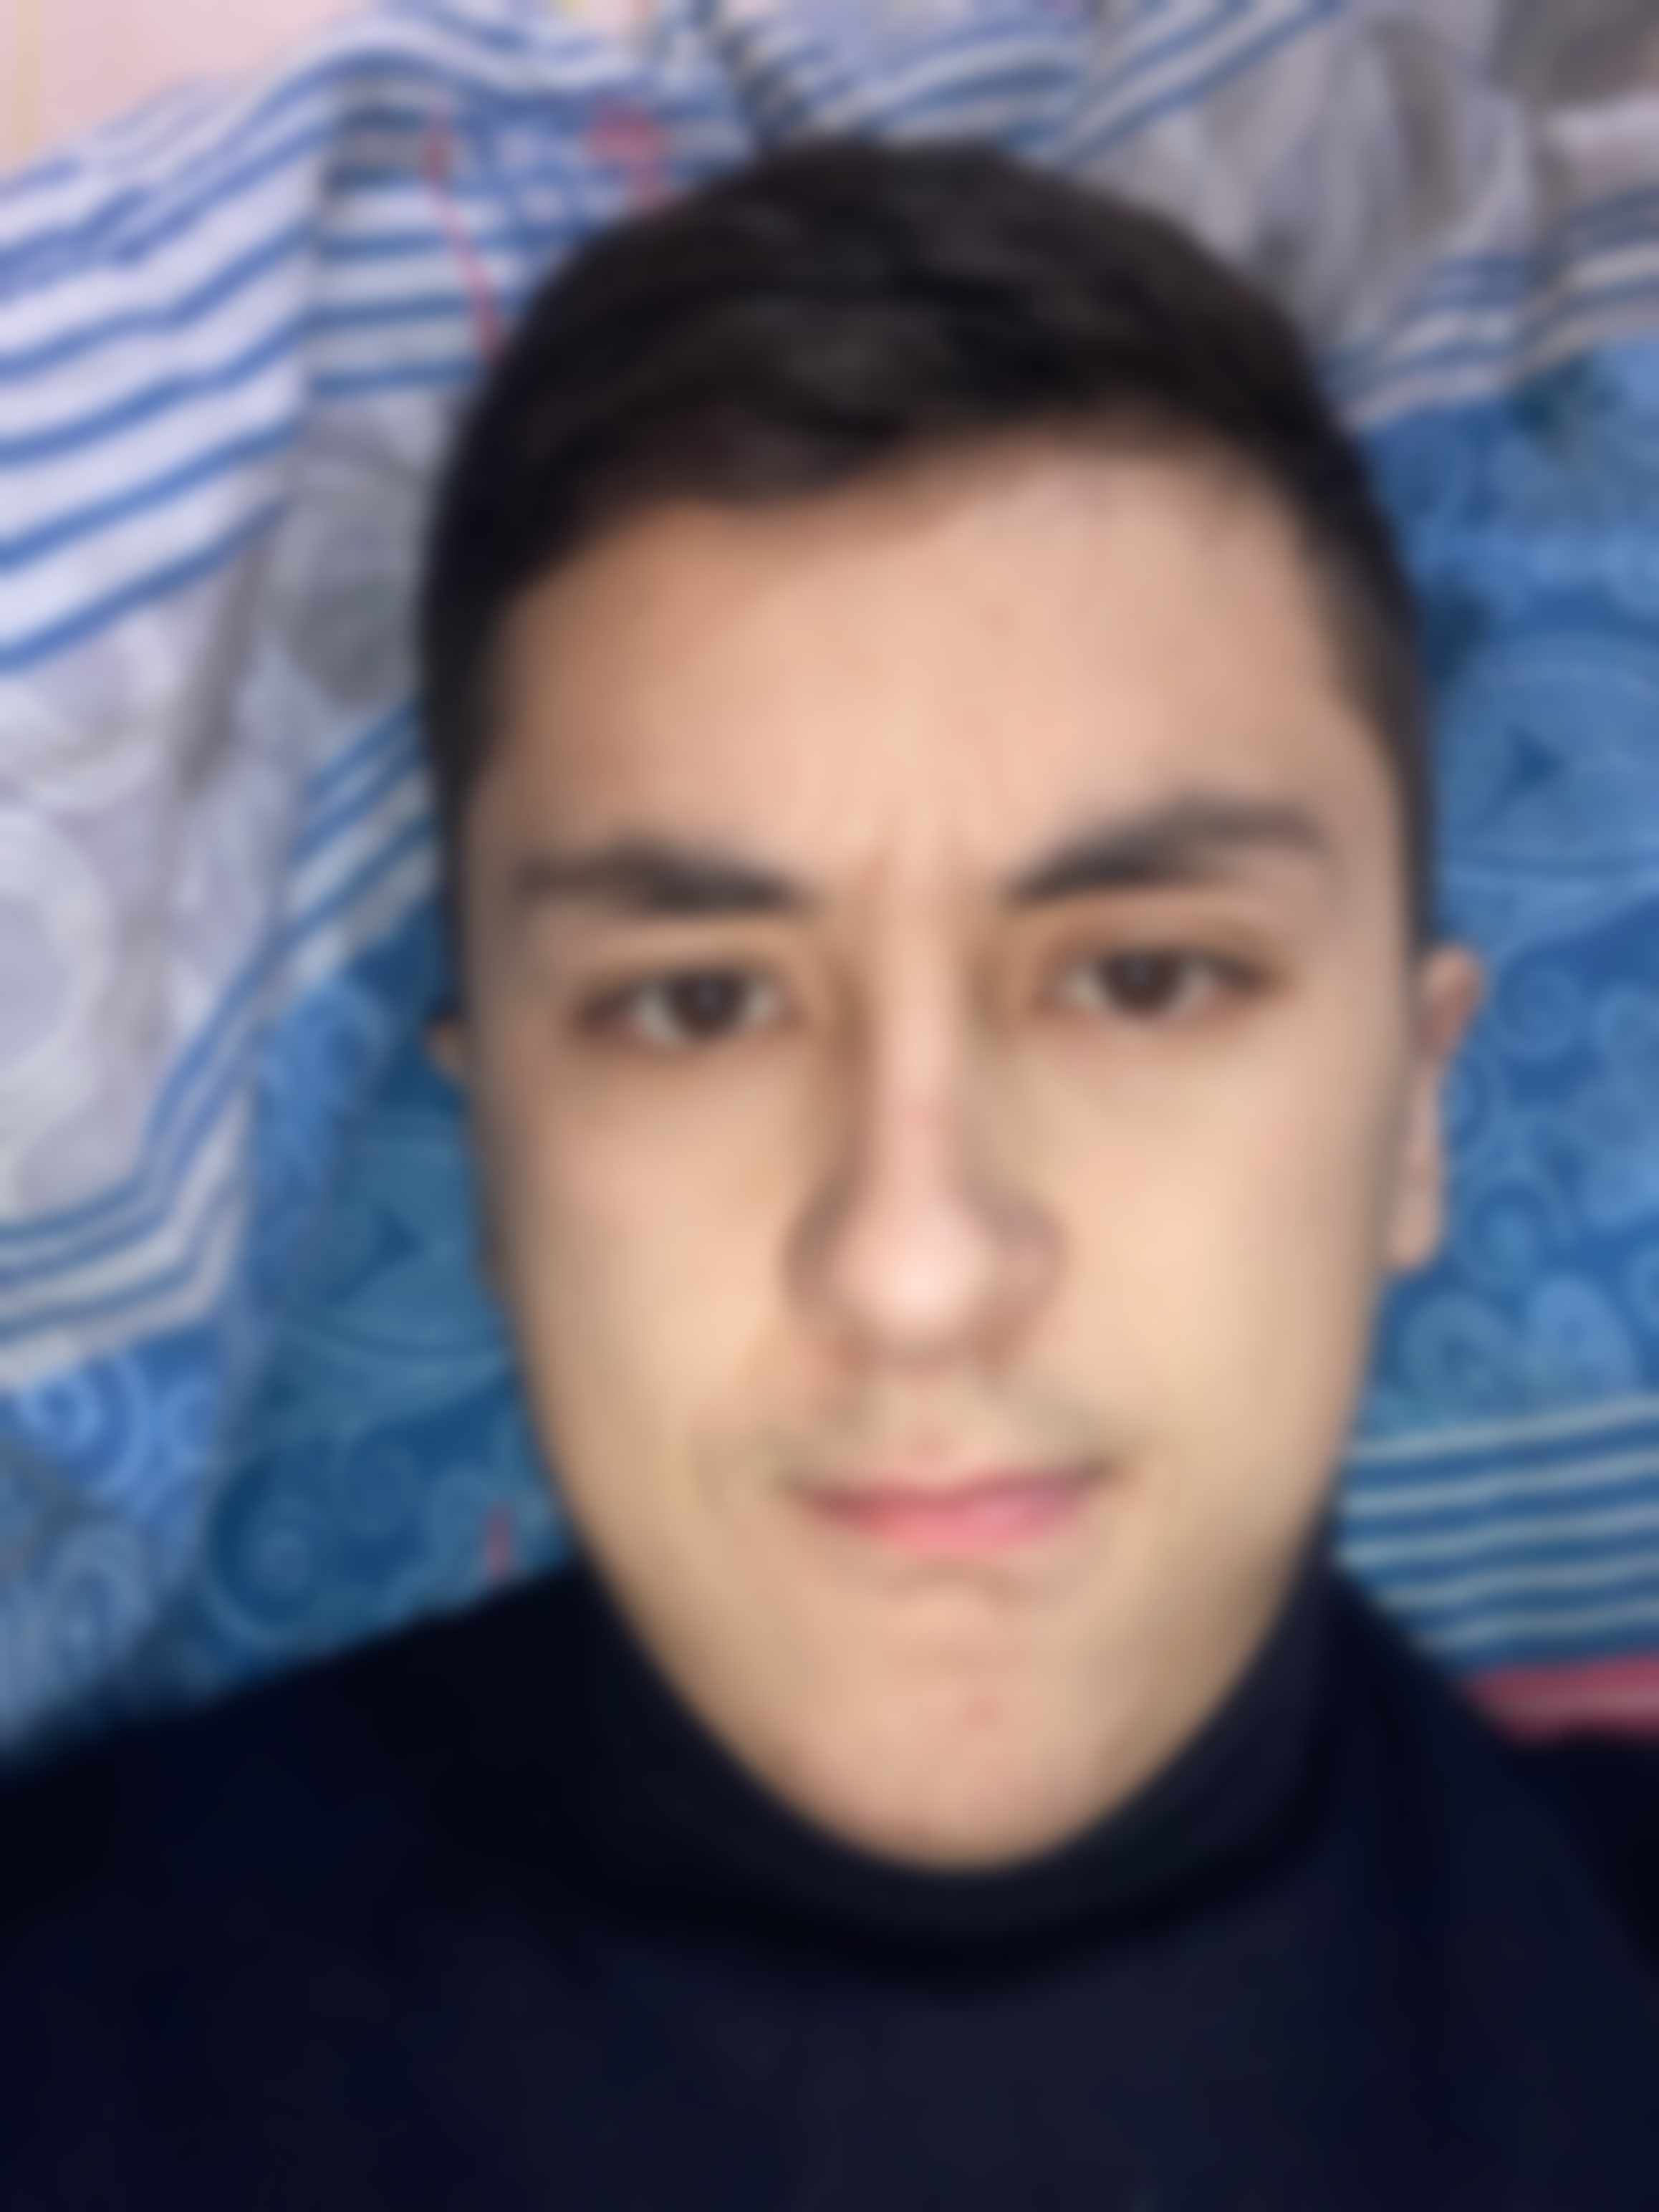

In [5]:
# Load and display the image
image_path = '/processed_images/H_12.jpg'
image = Image.open(image_path)
display.display(image)


In [6]:
processed_folder_path = '/processed_images'

# List files in the folder
processed = os.listdir(processed_folder_path)
print(processed)


['H_47.jpg', 'H_74.jpg', 'H_36.jpg', 'H_66.jpg', 'H_6.jpg', 'H_62.jpg', 'H_124.jpg', 'H_72.jpg', 'H_70.jpg', 'H_28.jpg', 'H_44.jpg', 'H_25.jpg', 'H_133.jpg', 'H_91.jpg', 'H_23.jpg', 'H_145.jpg', 'H_94.jpg', 'H_13.jpg', 'H_82.jpg', 'H_54.jpg', 'H_110.jpg', 'H_57.jpg', 'H_99.jpg', 'H_79.jpg', 'H_101.jpg', 'H_116.jpg', 'H_61.jpg', 'H_139.jpg', 'H_89.jpg', 'H_143.jpg', 'H_105.jpg', 'H_115.jpg', 'H_140.jpg', 'H_130.jpg', 'H_149.jpg', 'H_37.jpg', 'H_43.jpg', 'H_21.jpg', 'H_31.jpg', 'H_24.jpg', 'H_10.jpg', 'H_107.jpg', 'H_49.jpg', 'H_67.jpg', 'H_20.jpg', 'H_113.jpg', 'H_76.jpg', 'H_103.jpg', 'H_142.jpg', 'H_34.jpg', 'H_19.jpg', 'H_45.jpg', 'H_114.jpg', 'H_92.jpg', 'H_51.jpg', 'H_100.jpg', 'H_75.jpg', 'H_123.jpg', 'H_8.jpg', 'H_42.jpg', 'H_81.jpg', 'H_93.jpg', 'H_59.jpg', 'H_131.jpg', 'H_117.jpg', 'H_144.jpg', 'H_112.jpg', 'H_97.jpg', 'H_90.jpg', 'H_96.jpg', 'H_108.jpg', 'H_9.jpg', 'H_128.jpg', 'H_111.jpg', 'H_87.jpg', 'H_77.jpg', 'H_17.jpg', 'H_150.jpg', 'H_35.jpg', 'H_102.jpg', 'H_106.jpg', 

In [7]:
for index, row in df.iterrows():
    image_path = os.path.join(processed_folder_path, row['image_file_name'])
    image_paths.append(image_path)

    annotation = {
        'label': row['label'],
        'x_axis': row['x_axis'],
        'y_axis': row['y_axis'],
        'max_x_axis': row['max_x_axis'],
        'max_y_axis': row['max_y_axis']
    }
    annotations.append(annotation)

In [8]:
train_images, test_images, train_annotations, test_annotations = train_test_split(
    image_paths, annotations, test_size=0.2, random_state=42
)


In [9]:
img_size=256
# Define the model
base_model = tf.keras.applications.ConvNeXtXLarge(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_model.trainable = False

model = tf.keras.Sequential([
    
    base_model,
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),        
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(2, activation='linear')  # Output layer with 2 units for (x, y) predictions
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

1393257616/1393257616 [==============================] - 7s 0us/step


In [10]:
# Prepare the training data
X_train = []
y_train = []
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
for image_path, annotation in zip(train_images, train_annotations):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_size, img_size))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    
    # Scale the image
    img_array = datagen.standardize(img_array)
    X_train.append(img_array)

    y_train.append([
        annotation['x_axis'],
        annotation['y_axis']
    ])

X_train = np.array(X_train)
y_train = np.array(y_train)

In [11]:
model.fit(X_train, y_train,validation_split=0.1, epochs=150)

Epoch 1/150


2024-01-11 13:59:51.110606: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


4/4 [==============================] - 41s 5s/step - loss: 3403937.2500 - root_mean_squared_error: 1844.9762 - val_loss: 3372775.2500 - val_root_mean_squared_error: 1836.5117
Epoch 2/150
4/4 [==============================] - 4s 978ms/step - loss: 3347217.2500 - root_mean_squared_error: 1829.5402 - val_loss: 3308913.2500 - val_root_mean_squared_error: 1819.0419
Epoch 3/150
4/4 [==============================] - 4s 970ms/step - loss: 3282465.7500 - root_mean_squared_error: 1811.7576 - val_loss: 3234916.0000 - val_root_mean_squared_error: 1798.5873
Epoch 4/150
4/4 [==============================] - 4s 973ms/step - loss: 3201930.7500 - root_mean_squared_error: 1789.3939 - val_loss: 3150632.0000 - val_root_mean_squared_error: 1775.0020
Epoch 5/150
4/4 [==============================] - 4s 973ms/step - loss: 3121504.2500 - root_mean_squared_error: 1766.7780 - val_loss: 3057008.7500 - val_root_mean_squared_error: 1748.4303
Epoch 6/150
4/4 [==============================] - 4s 974ms/step - lo

In [12]:
X_test = []
y_test = []

for image_path, annotation in zip(test_images, test_annotations):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_size, img_size))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    # Scale the image
    img_array = datagen.standardize(img_array)
    X_test.append(img_array)

    y_test.append([
        annotation['x_axis'],
        annotation['y_axis']
    ])

In [13]:
X_test = np.array(X_test)
y_test = np.array(y_test)
model.evaluate(X_test, y_test)

1/1 [==============================] - 5s 5s/step - loss: 224068.0312 - root_mean_squared_error: 473.3582


[224068.03125, 473.3582458496094]

1/1 [==============================] - 0s 105ms/step


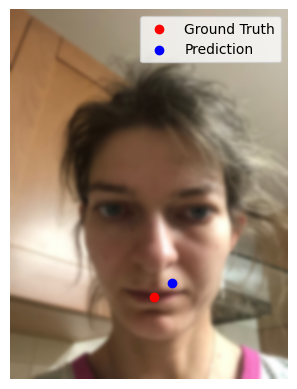

In [36]:

index_to_visualize = 22  # can change this to any index in your test set
true_coordinates = y_test[index_to_visualize]

# Get the test image, ground truth coordinates, and maximum bounds
test_image = X_test[index_to_visualize]
predicted_coordinates = model.predict(test_image.reshape(1, img_size, img_size, 3))[0]
test_image = tf.keras.preprocessing.image.load_img(test_images[index_to_visualize])
max_x = test_annotations[index_to_visualize]['max_x_axis']
max_y = test_annotations[index_to_visualize]['max_y_axis']

# Display the image using the maximum bounds
plt.imshow(test_image)
plt.xlim(0, max_x)
plt.ylim(max_y, 0)  # Invert the y-axis to match the image coordinates
plt.scatter(true_coordinates[0], true_coordinates[1], color='red', label='Ground Truth')
plt.scatter(predicted_coordinates[0], predicted_coordinates[1], color='blue', label='Prediction')
plt.legend()
plt.axis('off')
plt.show()

In [37]:
print('Predicted Coordinates: ',predicted_coordinates)
print('True Coordinates: ',true_coordinates)

Predicted Coordinates:  [1350.2837 2287.8108]
True Coordinates:  [1201 2402]


In [16]:
model.save('model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
